In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

X_train = pd.read_csv('https://raw.githubusercontent.com/msaricaumbc/DS_data/master/ds602/final/employee_departure_dataset_X.csv')
y_train = pd.read_csv('https://raw.githubusercontent.com/msaricaumbc/DS_data/master/ds602/final/employee_departure_dataset_y.csv')
X_train['left'] = y_train


Need to Clean Salary and PreviousSalary, they are text strings because they include the Letter K

In [3]:
X_train.columns

Index(['RecordId', 'Gender', 'Distance', 'YearsWorked', 'TrainingHours',
       'WorkLifeBalance', 'NumOfProjects', 'JobInvolvement', 'TeamSize',
       'MentorshipReceived', 'TechSkillLevel', 'AttendanceRate', 'StressLevel',
       'PeerFeedbackScore', 'AnnualLeaveDays', 'Certifications',
       'SkillDevelopmentCourses', 'ProjectComplexity', 'WorkSatisfactionScore',
       'JobEngagementScore', 'PhysicalActivityScore', 'MentalWellbeingScore',
       'DepartmentCode', 'PreviousSalary', 'Salary', 'SelfReview',
       'SupervisorReview', 'left'],
      dtype='object')

In [4]:
X_train[['Salary', 'PreviousSalary']] = X_train[['Salary', 'PreviousSalary']].map(lambda x: x.replace('K', '000') if isinstance(x, str) else x)
X_train[['Salary', 'PreviousSalary']] = X_train[['Salary', 'PreviousSalary']].astype(int)

In [5]:
X_train[['Salary','PreviousSalary']]

,Salary,PreviousSalary
0,73000,72000
1,64000,62000
2,74000,73000
3,64000,63000
4,64000,60000
...,...,...
499995,63000,61000
499996,62000,60000
499997,68000,65000
499998,54000,53000


In [6]:
X_train['Salary'].describe()

count    500000.000000
mean      68615.506000
std       12240.747609
min       40000.000000
25%       59000.000000
50%       66000.000000
75%       79000.000000
max      103000.000000
Name: Salary, dtype: float64

In [7]:
X_train['PreviousSalary'].describe()

count    500000.000000
mean      66596.672000
std       11843.355059
min       38000.000000
25%       58000.000000
50%       64000.000000
75%       77000.000000
max       99000.000000
Name: PreviousSalary, dtype: float64

In [8]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500000 entries, 0 to 499999
Data columns (total 28 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   RecordId                 500000 non-null  int64  
 1   Gender                   500000 non-null  int64  
 2   Distance                 499492 non-null  object 
 3   YearsWorked              500000 non-null  int64  
 4   TrainingHours            500000 non-null  int64  
 5   WorkLifeBalance          500000 non-null  int64  
 6   NumOfProjects            500000 non-null  int64  
 7   JobInvolvement           500000 non-null  int64  
 8   TeamSize                 500000 non-null  int64  
 9   MentorshipReceived       500000 non-null  int64  
 10  TechSkillLevel           500000 non-null  int64  
 11  AttendanceRate           500000 non-null  float64
 12  StressLevel              500000 non-null  int64  
 13  PeerFeedbackScore        500000 non-null  int64  
 14  Annu

In [9]:
X_train.head()

,RecordId,Gender,Distance,YearsWorked,TrainingHours,WorkLifeBalance,NumOfProjects,JobInvolvement,TeamSize,MentorshipReceived,...,WorkSatisfactionScore,JobEngagementScore,PhysicalActivityScore,MentalWellbeingScore,DepartmentCode,PreviousSalary,Salary,SelfReview,SupervisorReview,left
0,100,1,>30miles,7,91,4,14,3,8,1,...,3,2,9,5,5,72000,73000,4.0,4.0,0
1,101,0,~10miles,10,52,5,9,2,10,0,...,3,4,8,1,1,62000,64000,4.0,4.0,0
2,102,0,~10miles,10,80,3,13,3,16,0,...,7,2,7,8,5,73000,74000,4.0,2.0,1
3,103,0,~15miles,5,6,3,15,5,16,0,...,6,9,5,5,1,63000,64000,5.0,5.0,0
4,104,1,~10miles,10,3,2,13,3,18,0,...,3,4,4,4,2,60000,64000,4.0,4.0,0


In [10]:
X_train.isnull().sum()

RecordId                      0
Gender                        0
Distance                    508
YearsWorked                   0
TrainingHours                 0
WorkLifeBalance               0
NumOfProjects                 0
JobInvolvement                0
TeamSize                      0
MentorshipReceived            0
TechSkillLevel                0
AttendanceRate                0
StressLevel                   0
PeerFeedbackScore             0
AnnualLeaveDays               0
Certifications                0
SkillDevelopmentCourses       0
ProjectComplexity             0
WorkSatisfactionScore         0
JobEngagementScore            0
PhysicalActivityScore         0
MentalWellbeingScore          0
DepartmentCode                0
PreviousSalary                0
Salary                        0
SelfReview                 1042
SupervisorReview            995
left                          0
dtype: int64

Will need to impute distance, self review, supervisor review.

In [12]:
X_train['left'].value_counts()

left
0    319539
1    180461
Name: count, dtype: int64

Data is Unbalanced, ~60% stayed, 40% left. 

This is the bar graph of all the columns. Below this cell, I filtered out the ones with noticable differences.

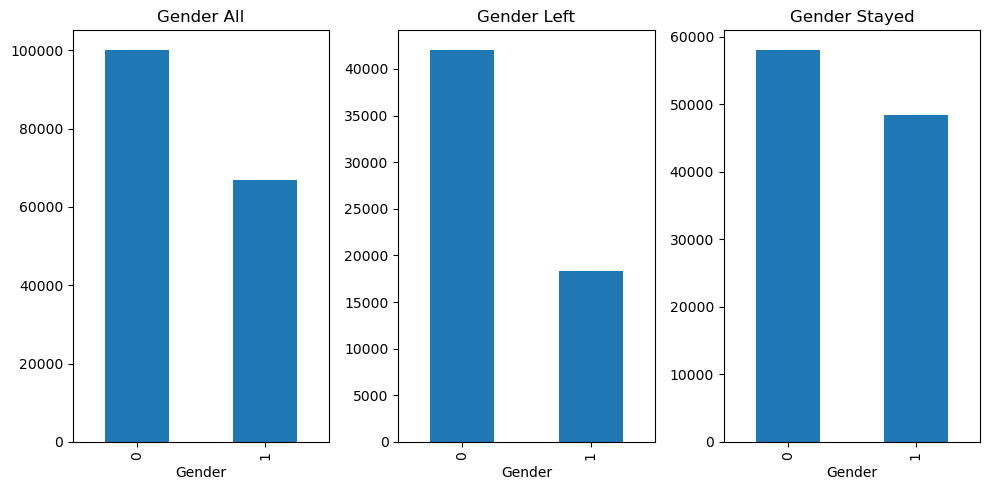

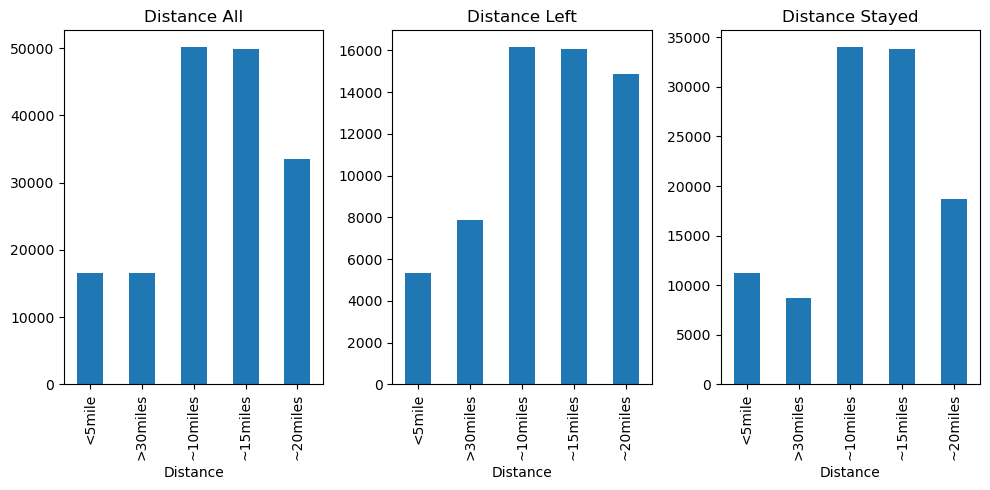

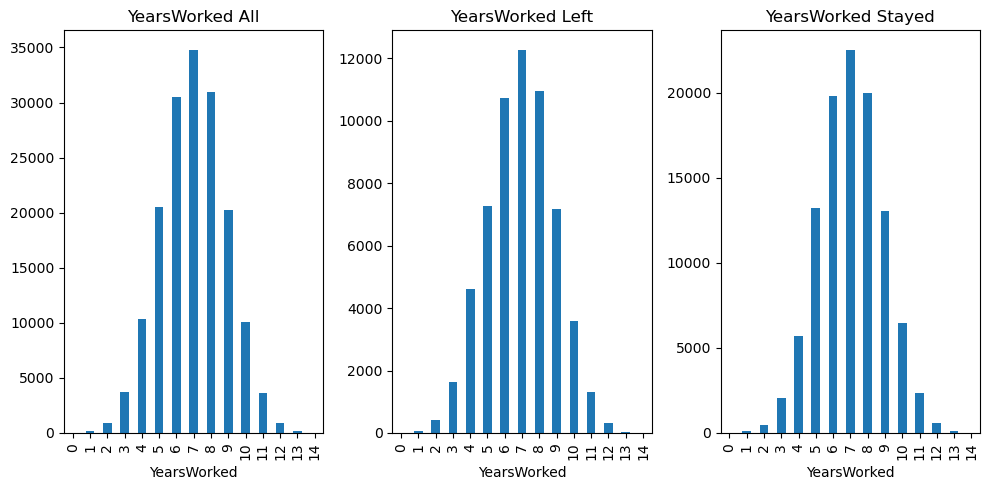

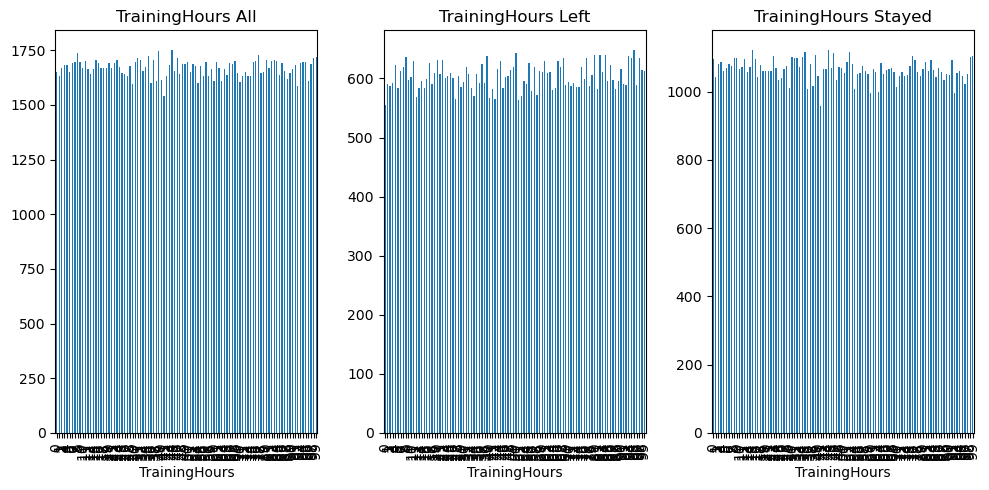

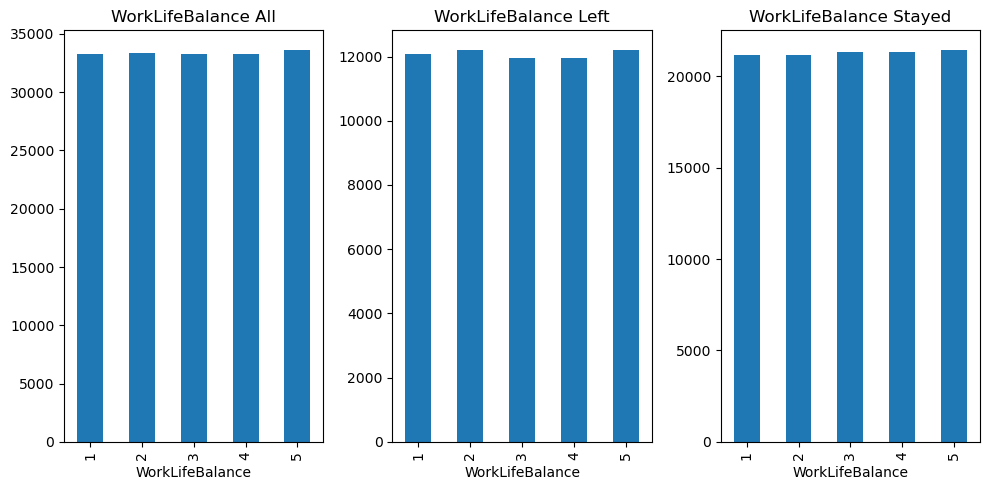

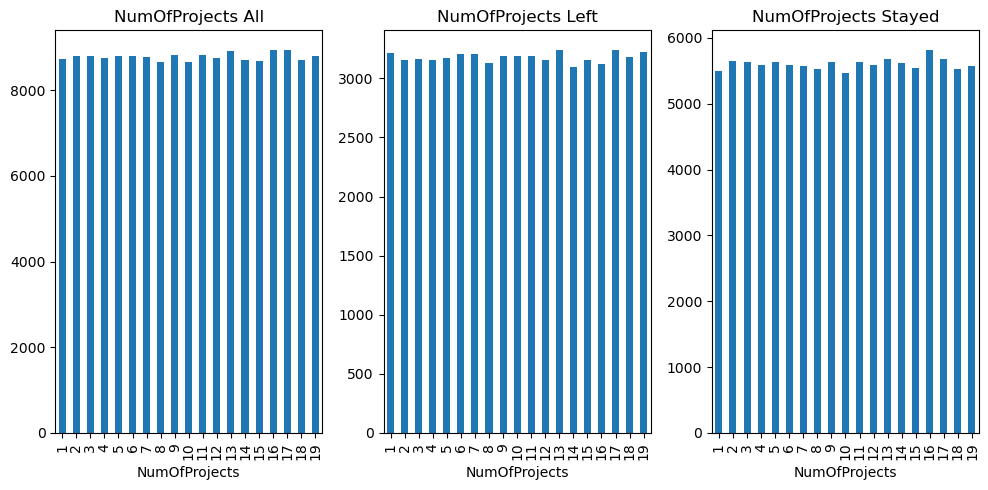

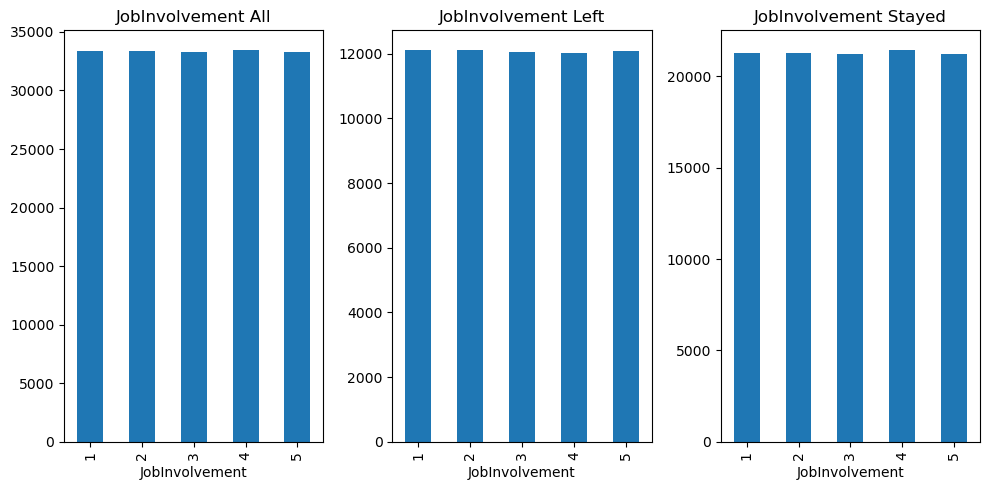

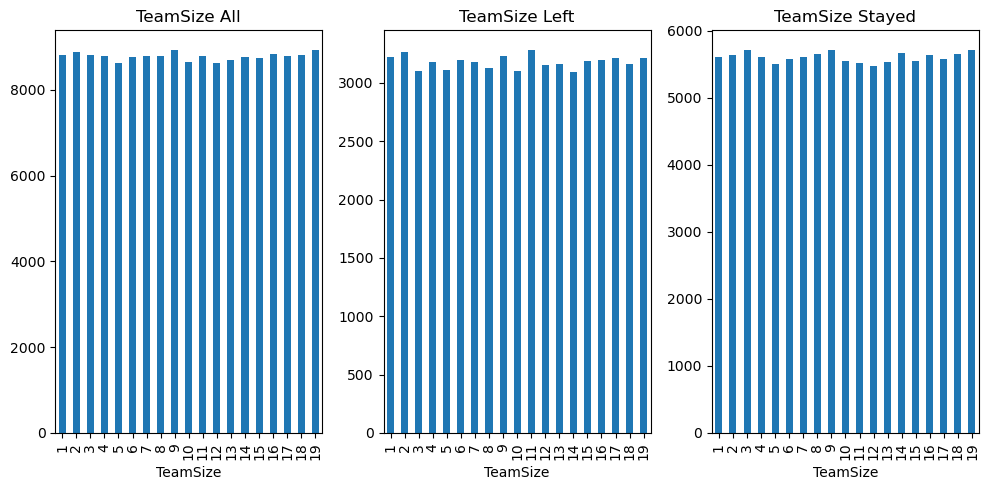

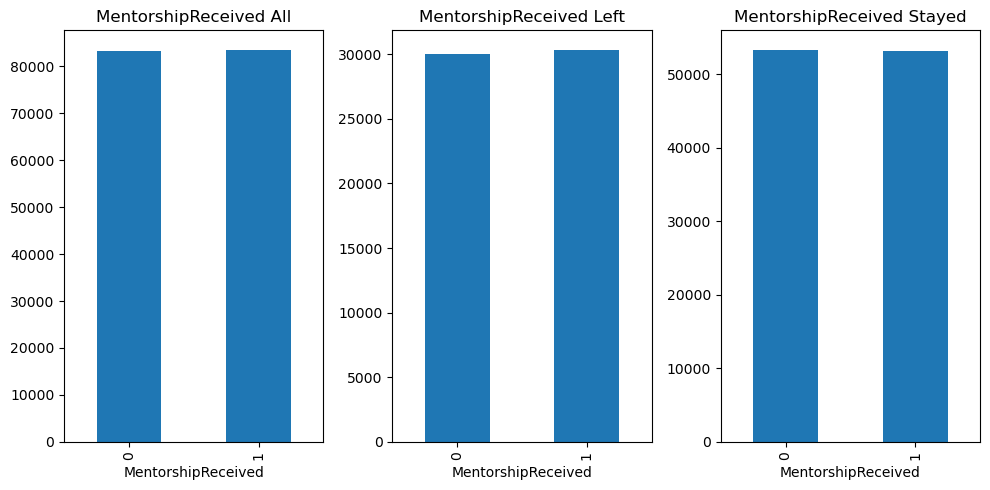

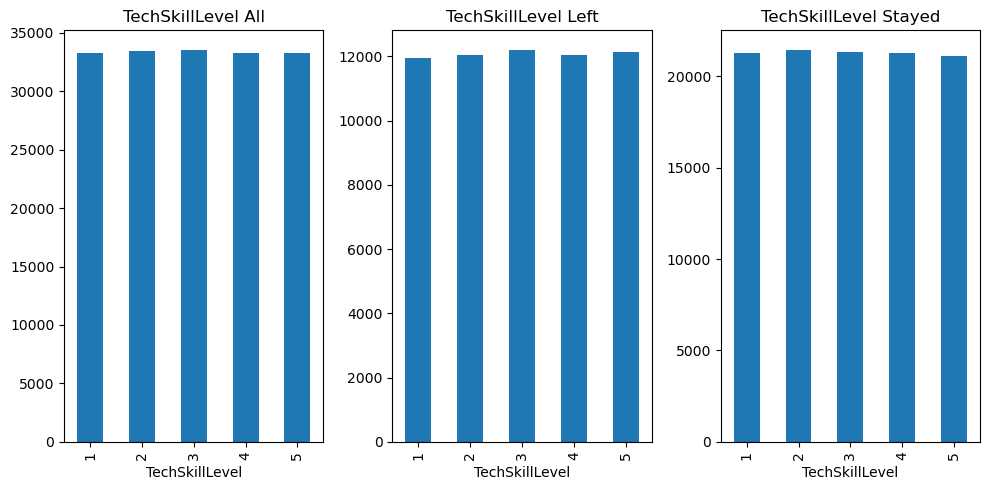

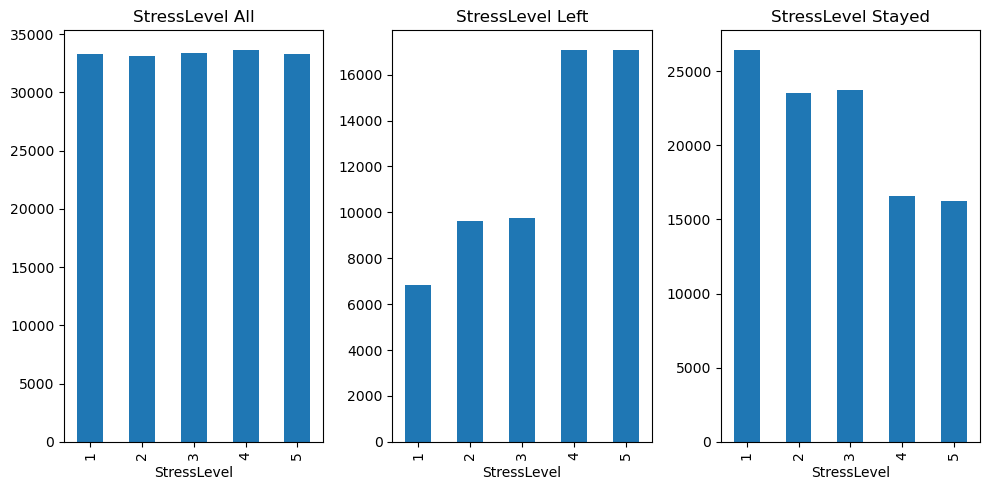

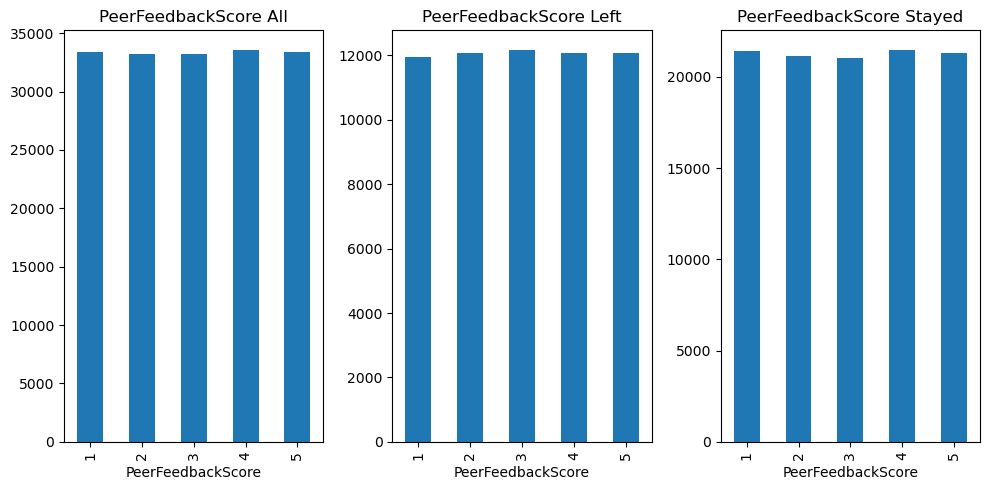

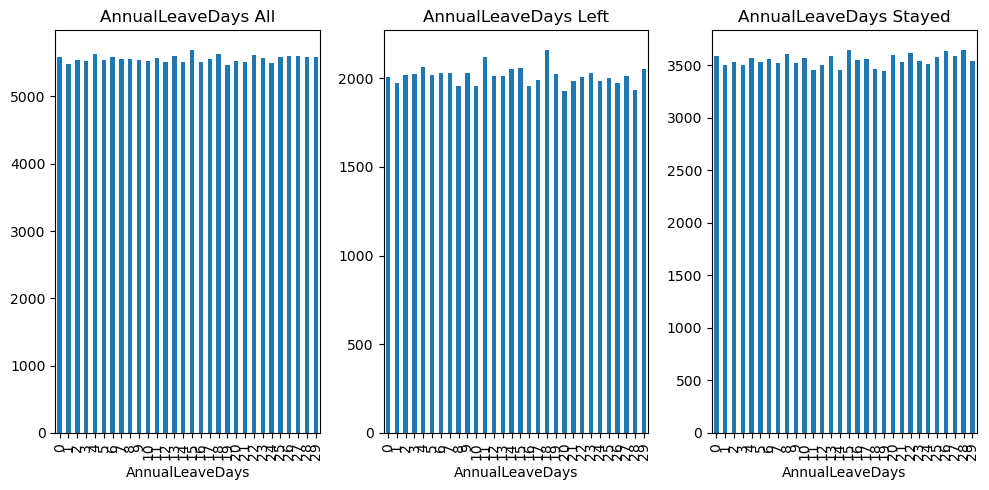

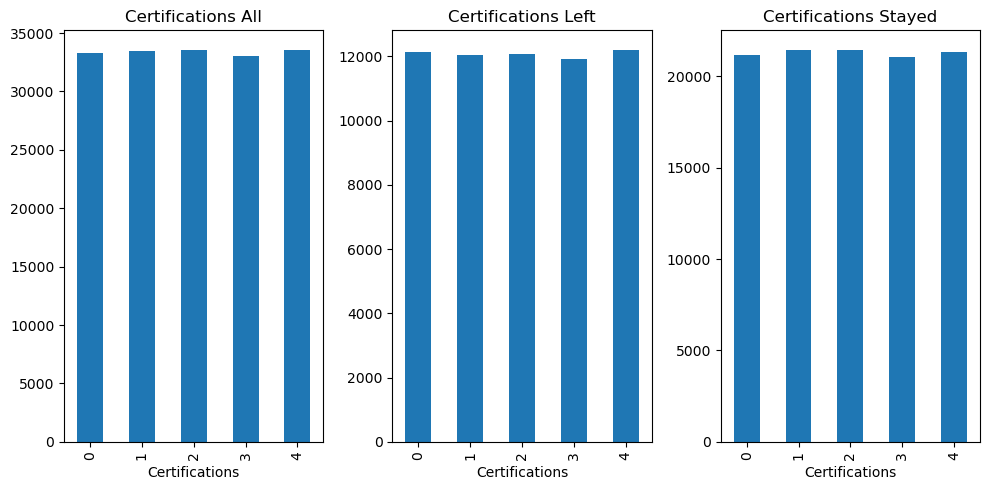

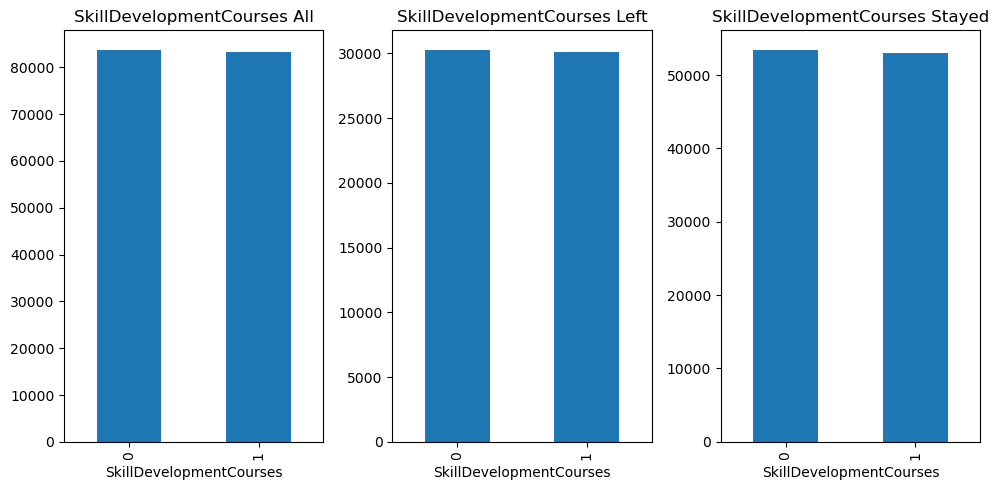

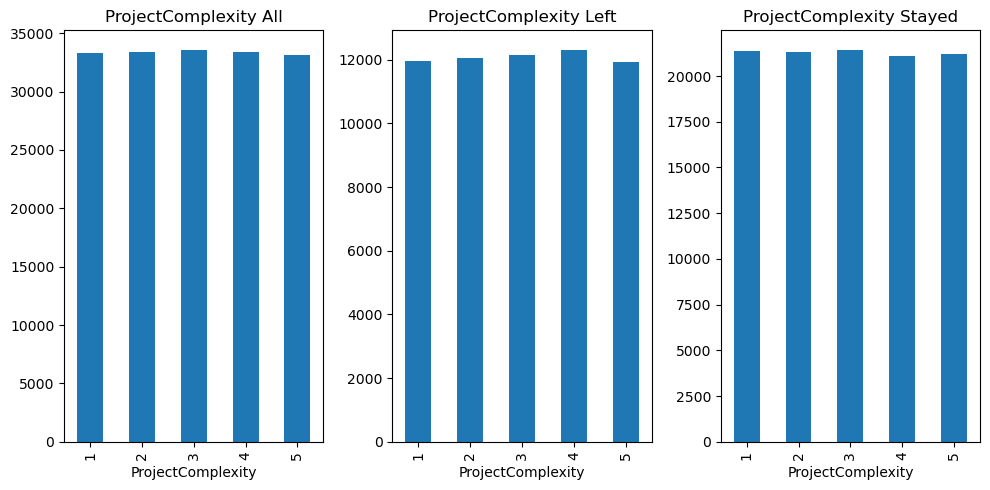

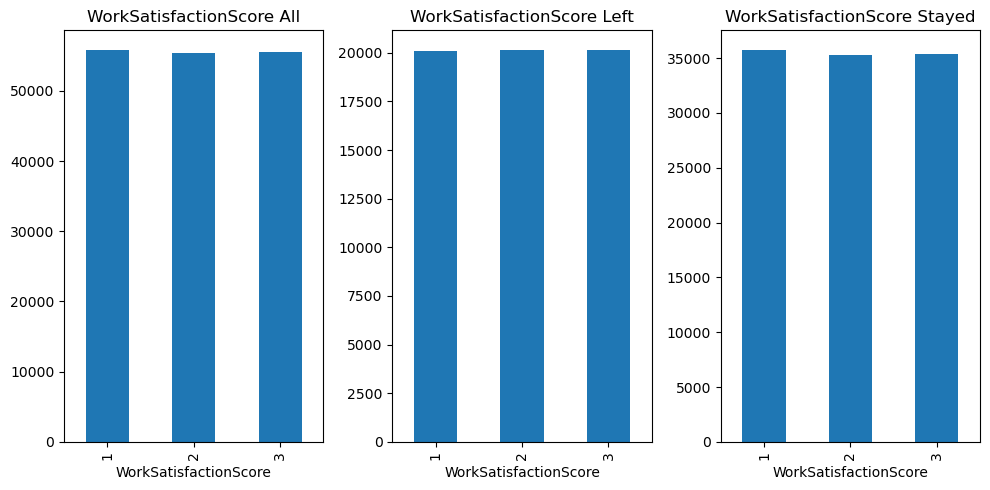

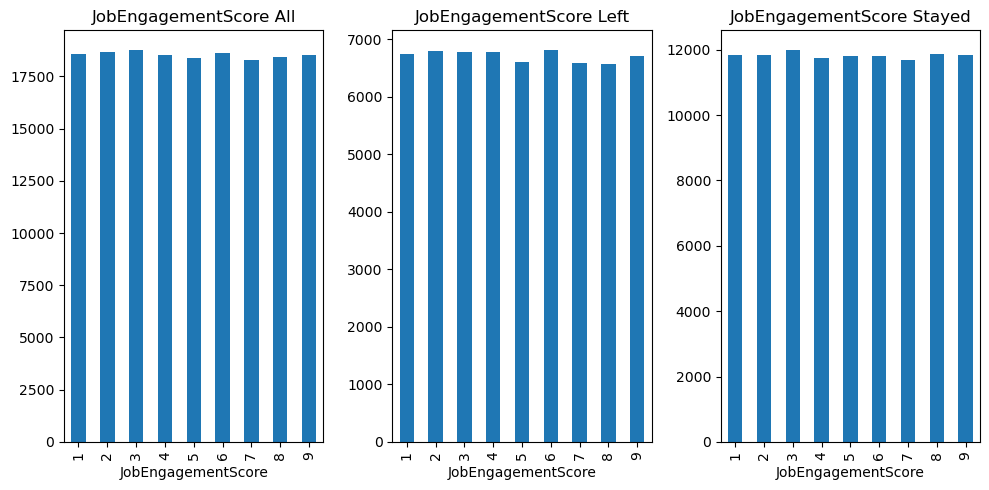

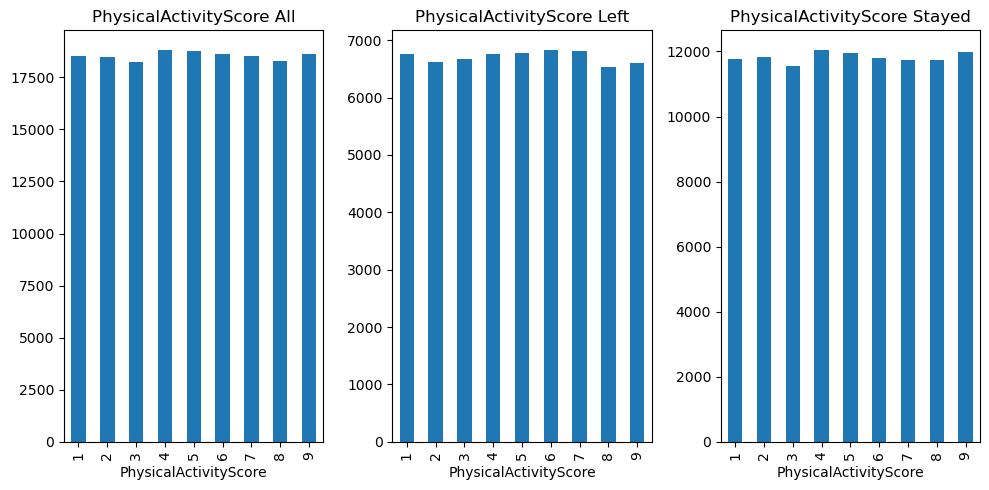

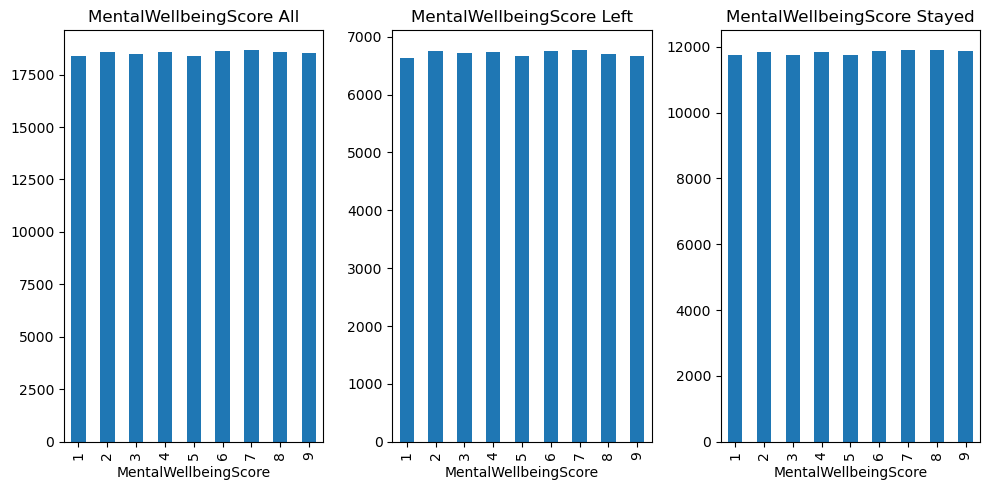

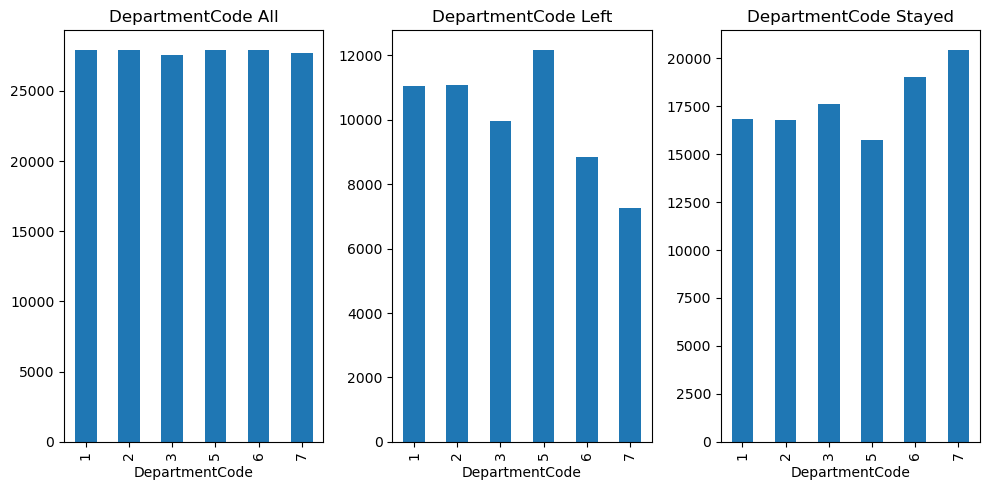

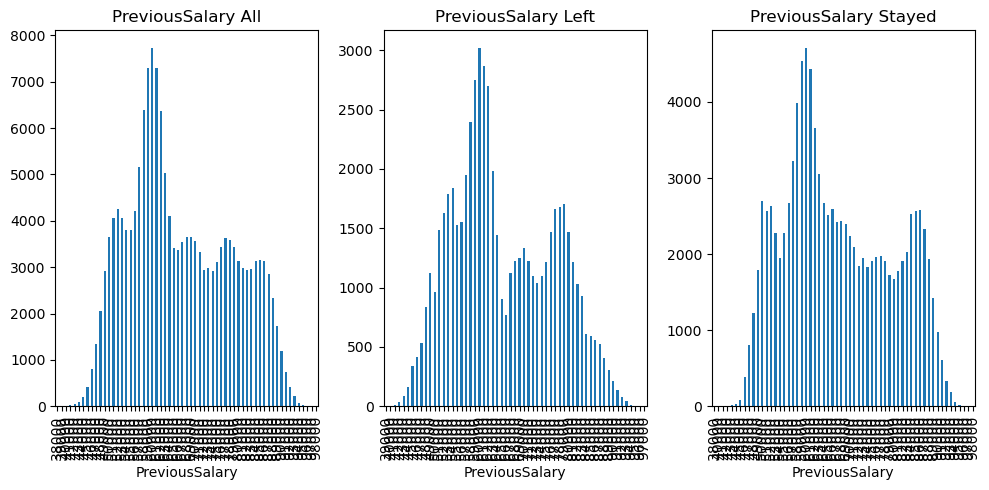

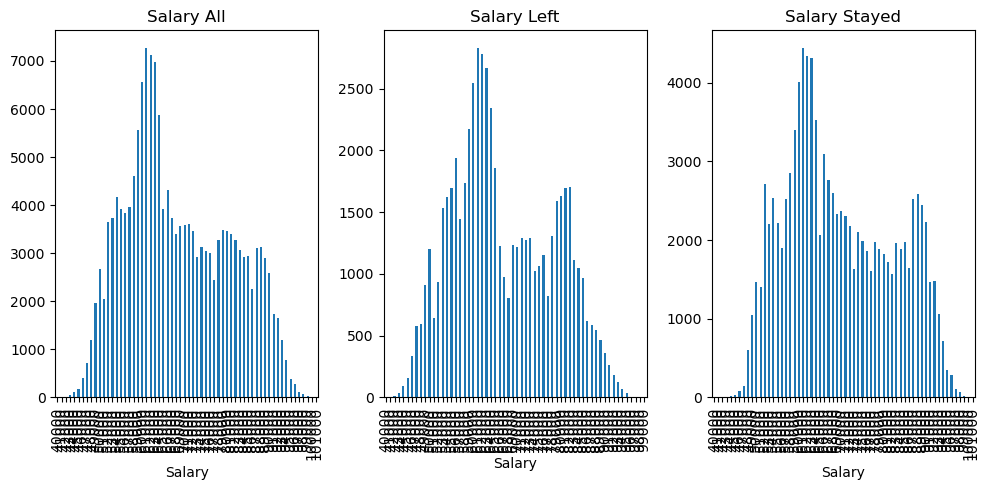

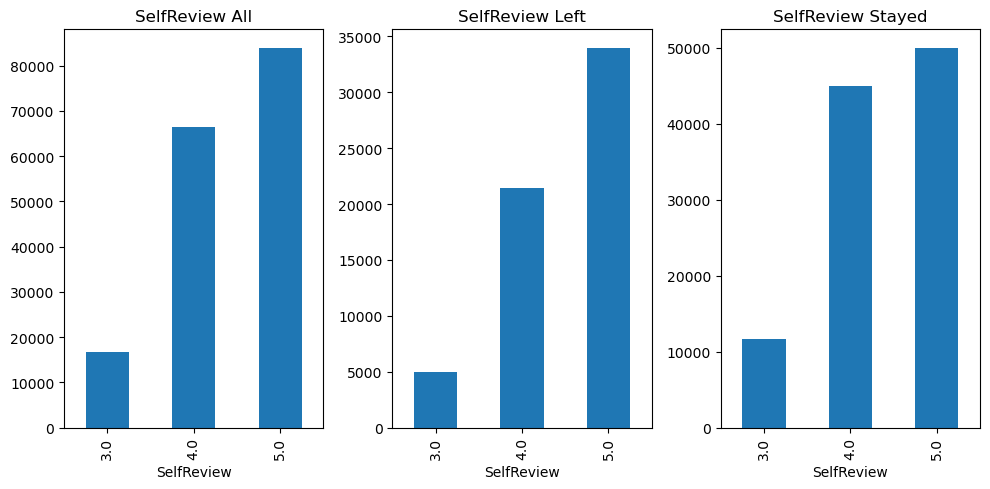

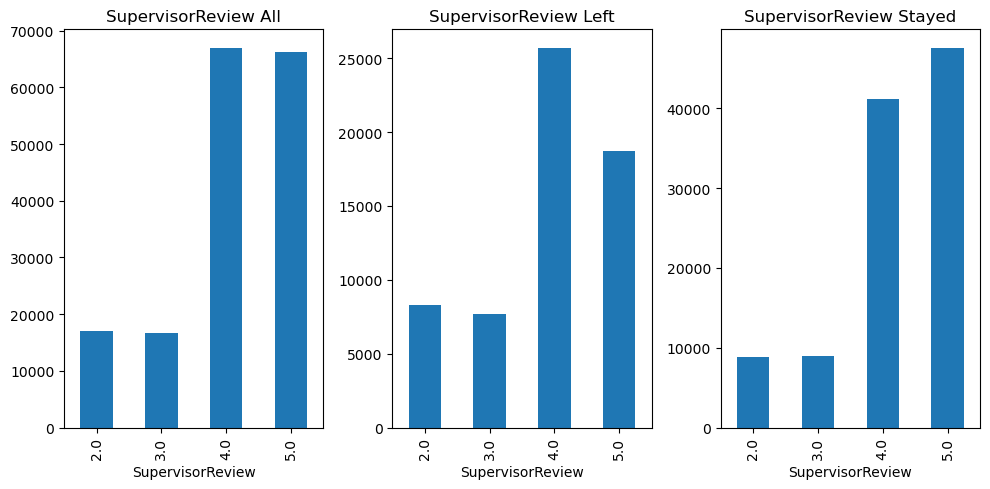

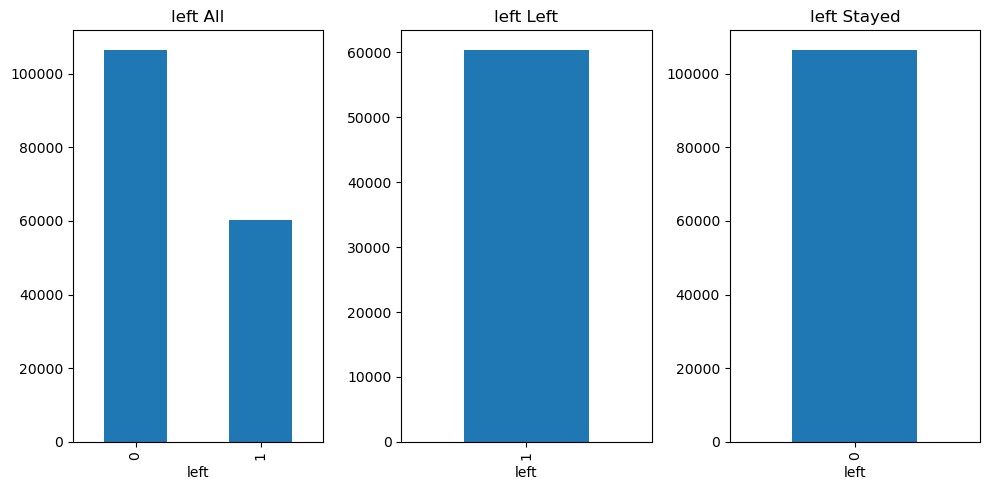

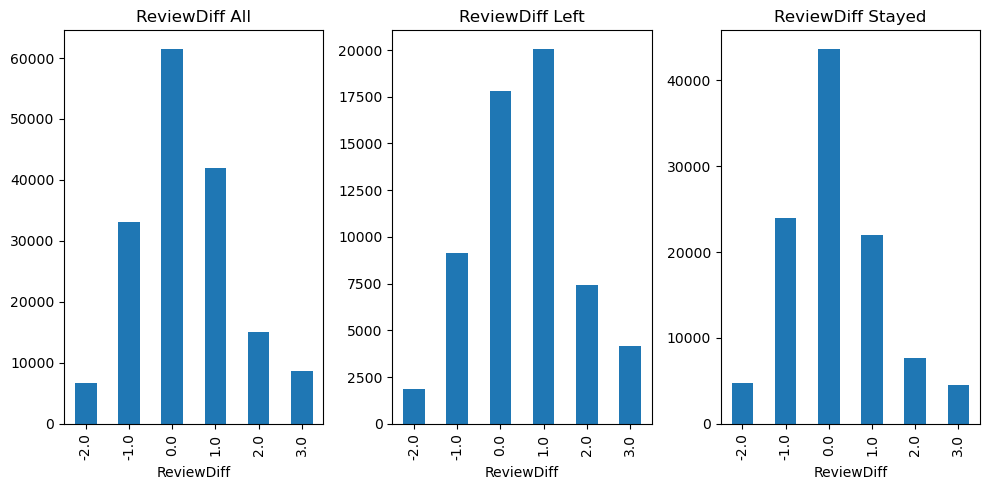

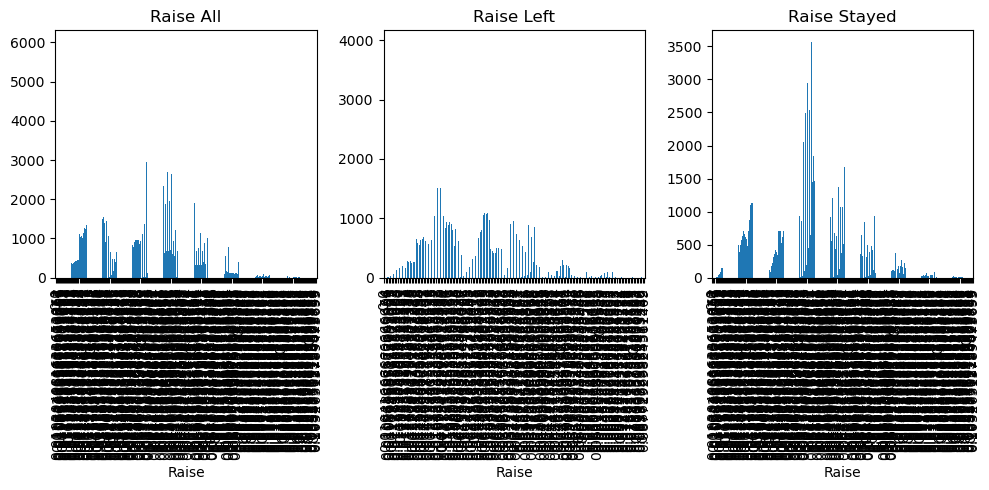

In [76]:

eda_columns = X_train.drop(['RecordId', 'AttendanceRate'], axis = 1).columns
X_graphs = X_train[X_train['WorkSatisfactionScore']<4]
for col in eda_columns:
    fig, axes = plt.subplots(1, 3, figsize=(10, 5))
    #print(col)
    #print(X_train[col].nunique())
    (X_graphs[col].value_counts().sort_index()).plot(kind='bar',ax=axes[0], title= col + ' All')
    (X_graphs[X_graphs['left']==1][col].value_counts().sort_index()).plot(kind='bar',ax=axes[1], title=col+' Left')
    (X_graphs[X_graphs['left']==0][col].value_counts().sort_index()).plot(kind='bar',ax=axes[2], title=col+ ' Stayed')
    plt.tight_layout()
    plt.show()
    #print(X_train[col].value_counts().sort_index())

The Below Graphs seem to mark the variables that noticably correlate with an employee leaving or not.

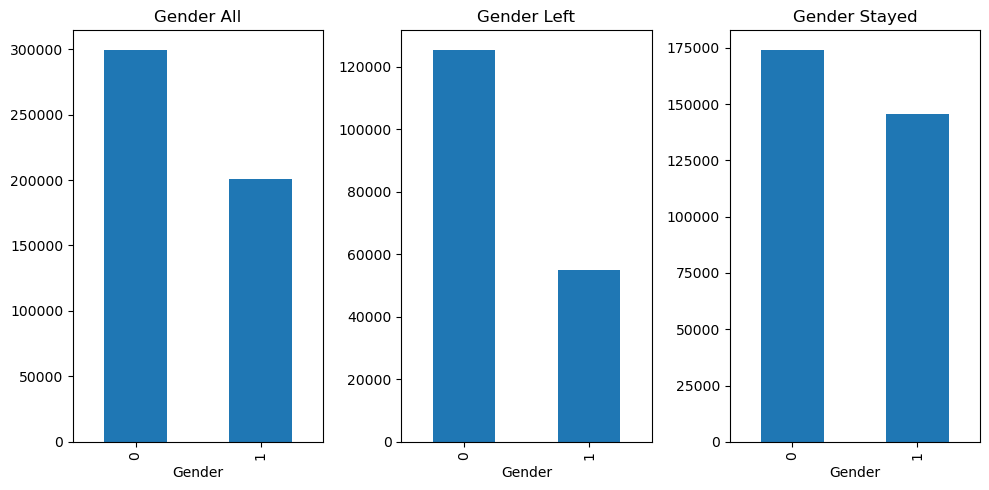

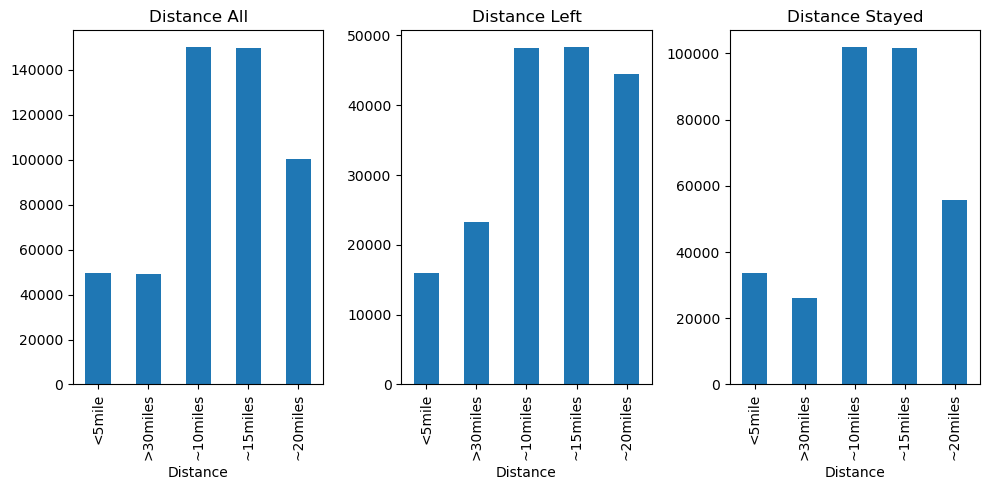

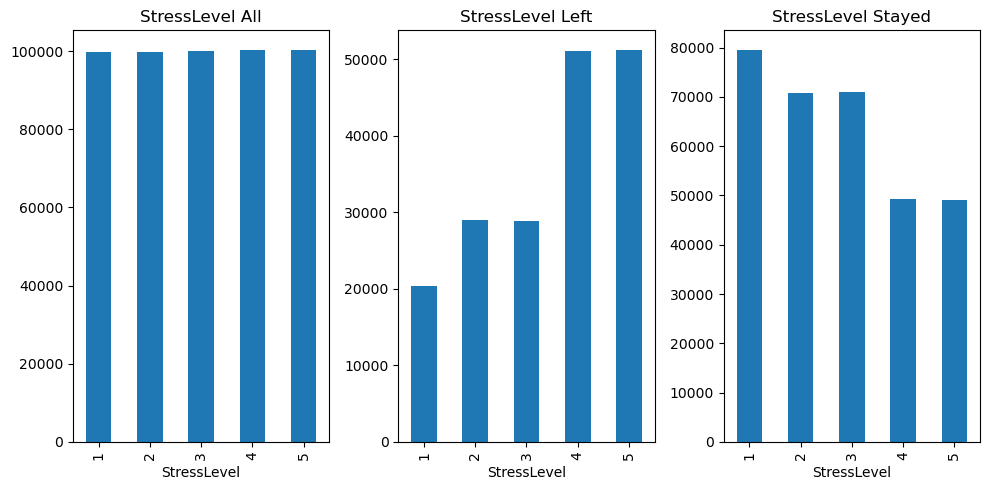

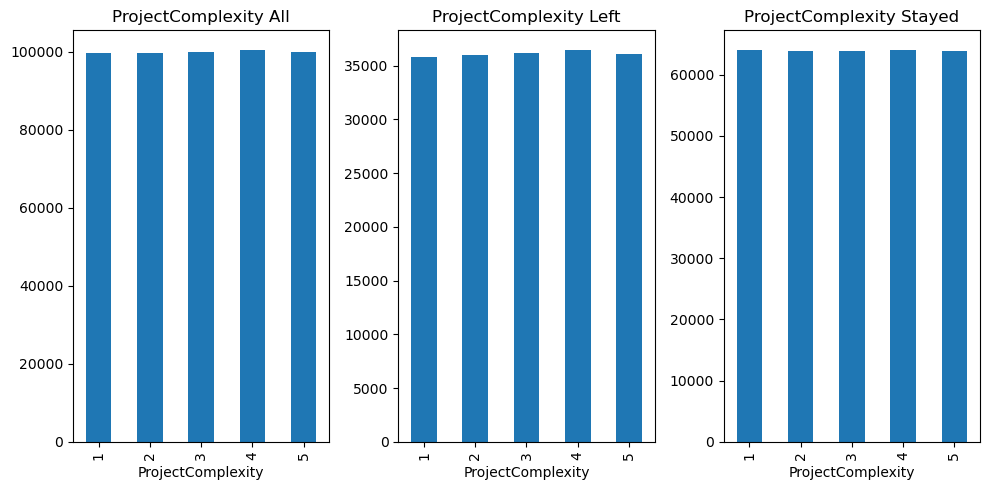

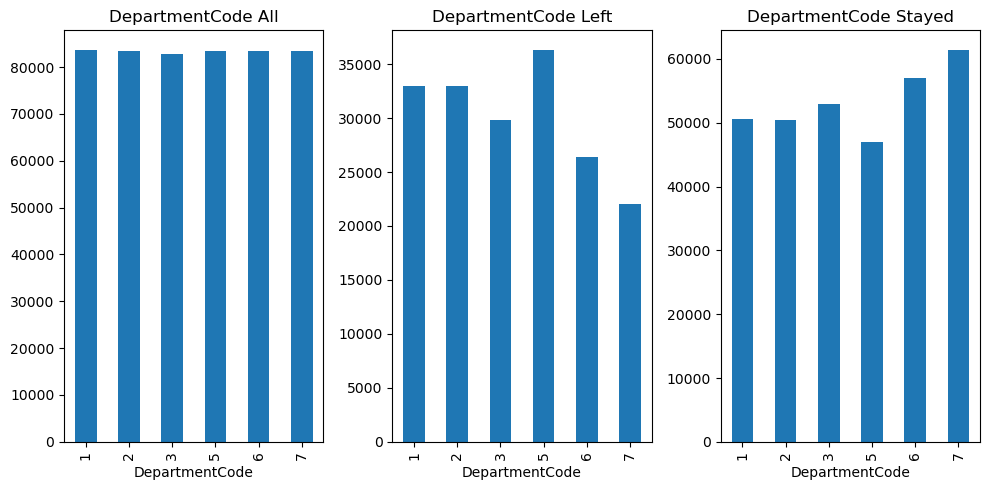

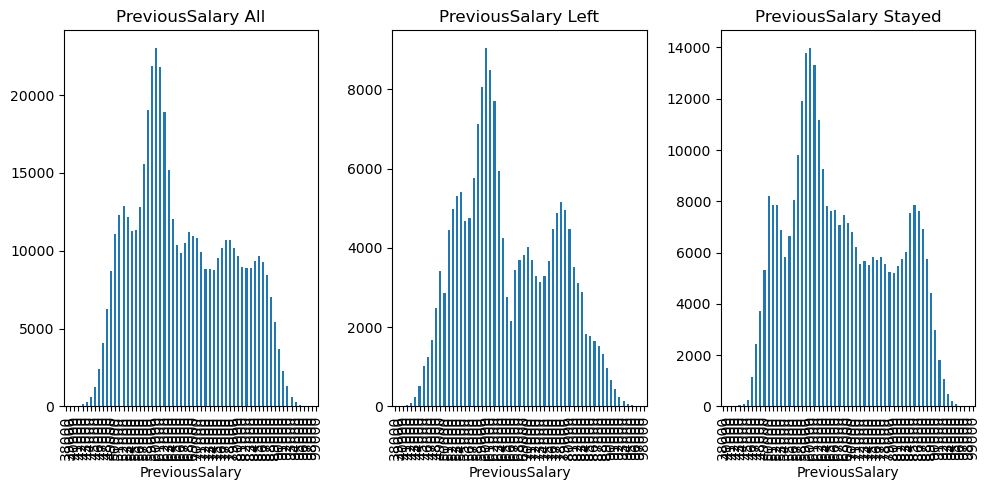

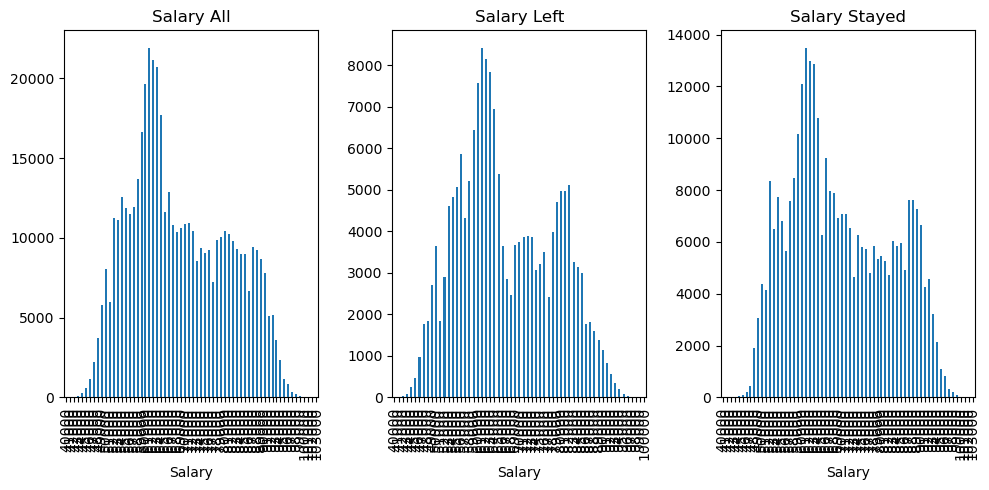

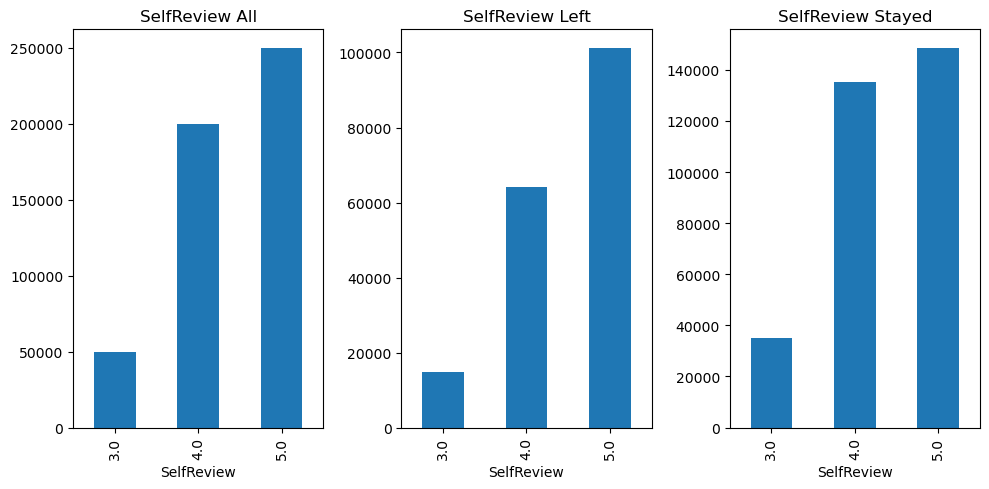

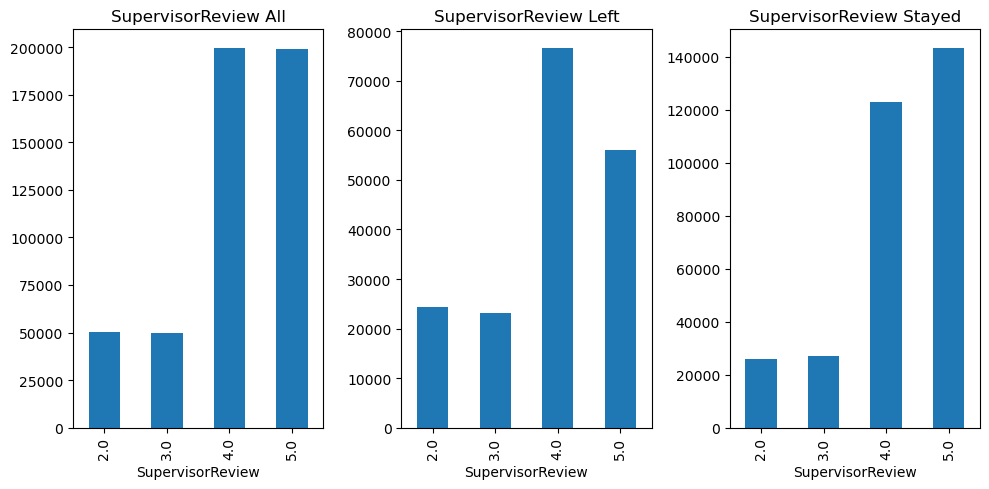

In [17]:
leaving_cols = ['Gender','Distance', 'StressLevel', 'ProjectComplexity', 'DepartmentCode','PreviousSalary', 'Salary', 'SelfReview', 'SupervisorReview']
for col in leaving_cols:
    fig, axes = plt.subplots(1, 3, figsize=(10, 5))
    #print(col)
    #print(X_train[col].nunique())
    (X_train[col].value_counts().sort_index()).plot(kind='bar',ax=axes[0], title= col + ' All')
    (X_train[X_train['left']==1][col].value_counts().sort_index()).plot(kind='bar',ax=axes[1], title=col+' Left')
    (X_train[X_train['left']==0][col].value_counts().sort_index()).plot(kind='bar',ax=axes[2], title=col+ ' Stayed')
    plt.tight_layout()
    plt.show()

In [18]:
X_train.dtypes

RecordId                     int64
Gender                       int64
Distance                    object
YearsWorked                  int64
TrainingHours                int64
WorkLifeBalance              int64
NumOfProjects                int64
JobInvolvement               int64
TeamSize                     int64
MentorshipReceived           int64
TechSkillLevel               int64
AttendanceRate             float64
StressLevel                  int64
PeerFeedbackScore            int64
AnnualLeaveDays              int64
Certifications               int64
SkillDevelopmentCourses      int64
ProjectComplexity            int64
WorkSatisfactionScore        int64
JobEngagementScore           int64
PhysicalActivityScore        int64
MentalWellbeingScore         int64
DepartmentCode               int64
PreviousSalary               int32
Salary                       int32
SelfReview                 float64
SupervisorReview           float64
left                         int64
dtype: object

<Axes: >

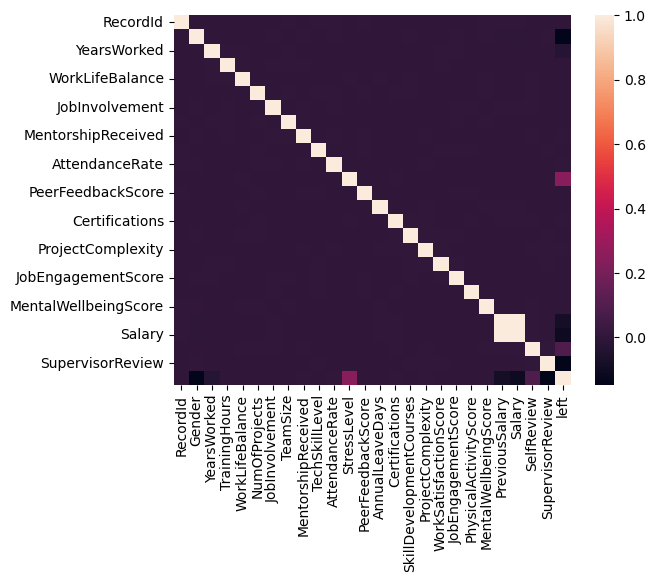

In [19]:
import seaborn as sns
#Not inclding Department Cost because, while it is a number, it is catagorical
corr = X_train.drop(['Distance', 'DepartmentCode'], axis=1).corr()
sns.heatmap(corr)

What variables correlate highest with leaving?

In [49]:
corr[abs(corr['left'])>.05]['left']

Gender             -0.146972
StressLevel         0.245448
PreviousSalary     -0.080020
Salary             -0.110633
SelfReview          0.089803
SupervisorReview   -0.146716
left                1.000000
Name: left, dtype: float64

Ideas for Generated columns:

SelfReview - SupervisorReview

Salary/PreviousSalary

Difference in percieved work: Self vs Supervisor

In [70]:
#impute with median values
X_train['SelfReview'] = X_train['SelfReview'].fillna(X_train['SelfReview'].median())
X_train['SupervisorReview'] = X_train['SupervisorReview'].fillna(X_train['SupervisorReview'].median())


X_train['ReviewDiff'] = X_train['SelfReview'] - X_train['SupervisorReview']
X_train['ReviewDiff'].describe()

count    500000.000000
mean          0.304430
std           1.153356
min          -2.000000
25%           0.000000
50%           0.000000
75%           1.000000
max           3.000000
Name: ReviewDiff, dtype: float64

Raise from previous year

In [25]:
X_train['Raise'] = X_train['Salary']/X_train['PreviousSalary'] - 1
X_train['Raise'].describe()

count    500000.000000
mean          0.030323
std           0.014621
min           0.000000
25%           0.017544
50%           0.031250
75%           0.038961
max           0.105263
Name: Raise, dtype: float64

In [72]:
corr_gen = X_train[['SupervisorReview','SelfReview','ReviewDiff', 'Raise', 'left']].corr()
corr_gen

,SupervisorReview,SelfReview,ReviewDiff,Raise,left
SupervisorReview,1.000000,0.001792,-0.818028,-0.001813,-0.146577
SelfReview,0.001792,1.000000,0.573712,0.002009,0.089684
ReviewDiff,-0.818028,0.573712,1.000000,0.002640,0.171640
Raise,-0.001813,0.002009,0.002640,1.000000,-0.386814
left,-0.146577,0.089684,0.171640,-0.386814,1.000000
